> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

Dataset  : TMDb movie data
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Question : Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pprint import pprint

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data()
data = pd.read_csv('data/tmdb-movies.csv')
data.iloc[0]
#   types and look for instances of missing or possibly errant data.


id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
data.drop_duplicates(keep = 'first', inplace = True)
len(data)
df_new = data.dropna(axis=1,how='all') 
len(df_new)




10865

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [4]:

data.iloc[0].genres.split('|', 1)

dfNew2 = df_new[~df_new['genres'].isnull()]
genr_year = []


for index, row in dfNew2.iterrows():
    release_year = row['release_year']
    genr = row['genres']
    genr_split = row['genres'].split('|')
    for val in genr_split:
        m = (val, release_year)
        genr_year.append(m)


genres_year_df = pd.DataFrame(genr_year, columns=['genres','year'])
grouped_genrus_year = genres_year_df.groupby(['year','genres']).size().reset_index().groupby(['year']).max()
grouped_genrus_year






,genres,0
year,,
1960,Western,13
1961,Western,16
1962,Western,21
1963,Western,13
1964,Western,20
1965,Western,20
1966,Western,16
1967,Western,17
1968,Western,20


Text(0.5,1,'Maximum movies released')

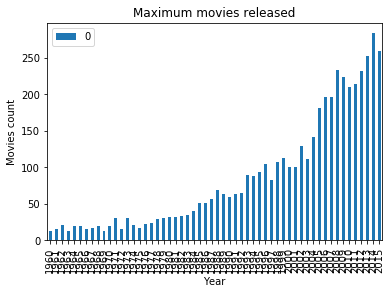

In [5]:
grouped_genrus_year.plot(kind='bar')

plt.ylabel("Movies count")
plt.xlabel("Year")
plt.title("Maximum movies released")

### Research Question 2  (Replace this header name!)

In [6]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# What kinds of properties are associated with movies that have high revenues?
data.corr()



,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


As per the table above, revenue is more corrlated with vote_count with the correlation value of 0.79

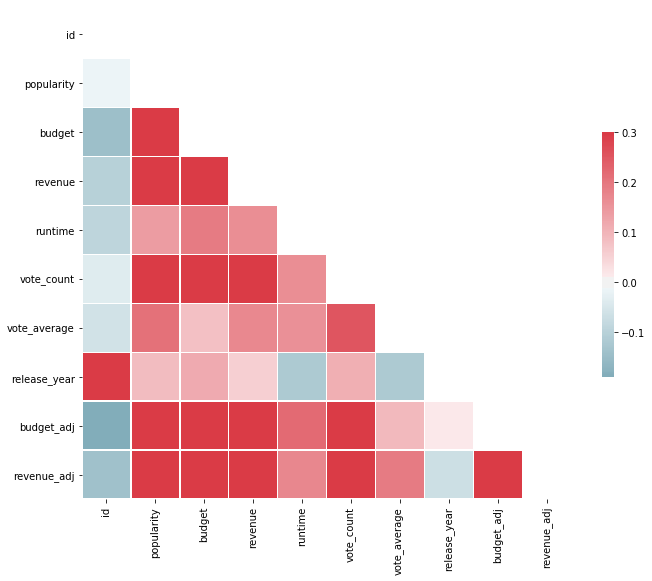

In [7]:
# Compute the correlation matrix
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
          square=True, linewidths=.5, cbar_kws={"shrink": .5})




<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

As per the data of movies, High revenu is associated with the following in the order it was associated.
1. Vote_count ( having correlation value of 79%). If the vote_count is high then obvious more people come and see the movie which in turns increase the revenue)
2. Budget ( having correlation value of 73%. Higher the budget is , higher the revenue of movie as per the dataset )
3. Popularity (having correlation value of 66.3%. Higher the popularity of movie is , higher the revenue of movie as per the dataset)
